##Math Bridge Week 1 Assignment
PK O’Flaherty - pkofy

1/8/2022

**Chapter 1.  Programming Challenge 1 page 22, Even-Odd Vending Machine**

In [18]:
'''
Even-odd vending machine
'''

def evenOddVendingMachine(a):
  #Use is_integer() method to display an error message if the input is a number
  #with significant digits beyond the decimal point
  #I tried casting 'a' as a float to use the is_integer method but couldn't get
  #the exception to be thrown.
  a = str(a)
  try:
    int(a)
  except:
    print('The input is not an integer.')
  a = int(a)

  #Print whether the number is even or odd
  if a % 2 == 0 :
    print('even')
  else :
    print('odd')

  #Display the number followed by the next 9 even or odd numbers
  for i in range(10) :
    print(a + 2*i)


In [19]:
evenOddVendingMachine(1)

odd
1
3
5
7
9
11
13
15
17
19


In [20]:
evenOddVendingMachine(2)

even
2
4
6
8
10
12
14
16
18
20


In [21]:
evenOddVendingMachine(1.5)

The input is not an integer.


ValueError: ignored

**Chapter 3.  Programming Challenge 2 page 89, Statistics Calculator**


In [30]:
#takes a list of numbers in the file mydata.txt
numbers = []
with open("mydata.txt") as f:
  for line in f:
    numbers.append(float(line))

#calculate the mean
s = sum(numbers)
N = len(numbers)
mean = s/N

#calculate the median
numbers.sort()
if N % 2 == 0:
  m1 = N/2
  m2 = (N/2) + 1
  m1 = int(m1) - 1
  m2 = int(m2) - 1
  median = (numbers[m1] + numbers[m2])/2
else:
  m = (N+1)/2
  m = int(m) - 1
  median = numbers[m]

#calculate the mode
from collections import Counter
c = Counter(numbers)
modevector = c.most_common(1)
mode = modevector[0][0]

#calculate the variance
diff = []
for num in numbers:
  diff.append(num-mean)
squared_diff = []
for d in diff:
  squared_diff.append(d**2)
sum_squared_diff = sum(squared_diff)
variance = sum_squared_diff/N

#calculate the standard deviation
stdev = variance**0.5

#print the results
print("The vector read from mydata.txt is:\n",numbers)
print("The mean is:",mean)
print("The median is:",median)
print("The mode is:",mode)
print("The variance is:",variance)
print("The standard deviation is:",stdev)


The vector read from mydata.txt is:
 [20.0, 50.0, 88.0, 100.0, 120.0, 120.0, 300.0, 1000.0]
The mean is: 224.75
The median is: 110.0
The mode is: 120.0
The variance is: 91917.9375
The standard deviation is: 303.1797115573534



**Chapter 5.  Programming Challenge 2 page 143, Law of Large Numbers**



In [24]:
'''
verify the law of large numbers, when rolling a six-sided die
for the following number of trials: 100, 1000, 10000, 100000, 500000
'''

import random

#calculate expected value of a six-sided die roll
e = (1+2+3+4+5+6)/6

addUp = 0
for i in range(500000):
  addUp = addUp + random.randint(1,6)
  avgSoFar = addUp/(i+1)
  if i == 99:
    TAvg1 = avgSoFar
  if i == 999:
    TAvg2 = avgSoFar
  if i == 9999:
    TAvg3 = avgSoFar
  if i == 99999:
    TAvg4 = avgSoFar
  if i == 499999:
    TAvg5 = avgSoFar

print("Expected value:", e)
print("Trials: 100 Trial average", TAvg1)
print("Trials: 1000 Trial average", TAvg2)
print("Trials: 10000 Trial average", TAvg3)
print("Trials: 100000 Trial average", TAvg4)
print("Trials: 500000 Trial average", TAvg5)


Expected value: 3.5
Trials: 100 Trial average 3.28
Trials: 1000 Trial average 3.522
Trials: 10000 Trial average 3.5049
Trials: 100000 Trial average 3.50451
Trials: 500000 Trial average 3.504764


**Chapter 7.  Programming Challenge 2 page 205, Implement the Gradient Descent**

Enter a function in one variable: x**2
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 1
x: 0.00377789318629572
Minimum value: 0.0000142724769270596


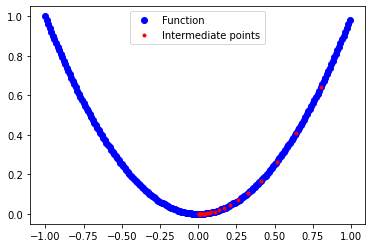

In [26]:
'''
Use gradient descent to find the minimum value of a single-variable function
'''

import math
from sympy import Derivative, Symbol, sympify, solve
import matplotlib.pyplot as plt

def grad_descent(x0, f1x, x):
  #check if f1x=0 has a solution
  if not solve(f1x):
    print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
    return None
  epsilon = 1e-3
  step_size = 1e-1
  x_old = x0
  x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
  
  #list to store the X values traversed
  X_traversed = []
  while abs(x_old - x_new) > epsilon:
    X_traversed.append(x_new)
    x_old = x_new
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
  
  return x_new, X_traversed

def frange(start, final, interval):
  numbers = []
  while start < final:
    numbers.append(start)
    start = start + interval

  return numbers

def create_plot(X_traversed, f, var):
  #first create the graph of the function itself
  x_val = frange(-1, 1, 0.01)
  f_val = [f.subs({var:x}) for x in x_val]
  plt.plot(x_val, f_val, 'bo')
  #calculate the function value at each of the intermediate
  #points traversed
  f_traversed = [f.subs({var:x}) for x in X_traversed]
  plt.plot(X_traversed, f_traversed, 'r.')
  plt.legend(['Function', 'Intermediate points'], loc='best')
  plt.show()

if __name__ == '__main__':

  f = input('Enter a function in one variable: ')
  var = input('Enter the variable to differentiate with respect to: ')
  var0 = float(input('Enter the initial value of the variable: '))
  try:
    f = sympify(f)
  except SympifyError:
    print('Invalid function entered')
  else:
    var = Symbol(var)
    d = Derivative(f, var).doit()
    var_min, X_traversed = grad_descent(var0, d, var)
    if var_min:
      print('{0}: {1}'.format(var.name, var_min))
      print('Minimum value: {0}'.format(f.subs({var:var_min})))
      create_plot(X_traversed, f, var)
